In [1]:
import tensorflow as tf 
import numpy as np 
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

In [3]:
(X_train, Y_train), (X_val, Y_val) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
X_train_imb = np.load('../input/dataset-all/x_train_imbalanced.npy')
y_train_balanced_asym = np.load('../input/dataset-all/y_train_balanced_asym.npy')
y_train_balanced_sym = np.load('../input/dataset-all/y_train_balanced_sym.npy')
y_train_imbalanced = np.load('../input/dataset-all/y_train_imbalanced.npy')
y_train_imbalanced_asym = np.load('../input/dataset-all/y_train_imbalanced_asym.npy')
y_train_imbalanced_sym = np.load('../input/dataset-all/y_train_imbalanced_sym.npy')

In [4]:
def plot_fig(X, y):
    plt.figure(figsize=(20,4))
    for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
        plt.subplot(1, 5, index + 1)
        plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
        plt.title('Training: %i\n' % int(label), fontsize = 20)

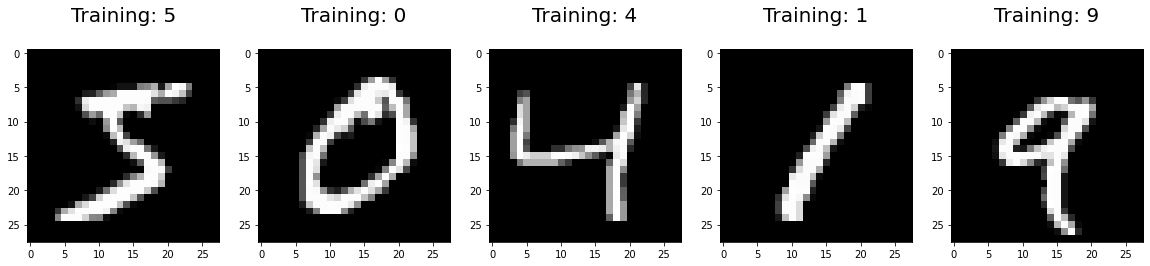

In [5]:
plot_fig(X_train, Y_train)

In [ ]:
# def unbalanced_dataset(X_train, Y_train):
#     x_train = []
#     y_train = []
    
#     x_val = []
#     y_val = []
    
#     for i in range(0, len(X_train)):
#         rdm1 = random.uniform(0, 1)
#         rdm2 = random.uniform(0, 1)
#         if (Y_train[i]%2 ==0):
#             if rdm1>0.4:
#                 x_train.append(X_train[i])
#                 y_train.append(Y_train[i])
#         else:
#             if rdm2>0.1:
#                 x_train.append(X_train[i])
#                 y_train.append(Y_train[i])
                
                
#     for i in range(0, len(X_val)):
#         rdm1 = random.uniform(0, 1)
#         rdm2 = random.uniform(0, 1)
#         if (Y_val[i]%2 ==0):
#             if rdm1>0.4:
#                 x_val.append(X_val[i])
#                 y_val.append(Y_val[i])
#         else:
#             if rdm2>0.1:
#                 x_val.append(X_val[i])
#                 y_val.append(Y_val[i])
                
                
#     return np.array(x_train), np.array(y_train), np.array(x_val), np.array(y_val)


In [ ]:
#x_train_ub, y_train_ub, x_val_ub, y_val_ub = unbalanced_dataset(X_train, Y_train)

In [6]:
def check_class_distribution(y_train):
    class_frq = {}
    for val in y_train:
        if class_frq.get(val) is not None:
            class_frq[val] = class_frq.get(val) +1
        else:
            class_frq[val] = 1
    class_frq
    
    return class_frq

In [9]:
print("Class Distribution: ", check_class_distribution(y_train_imbalanced))

Class Distribution:  {5: 4378, 0: 2385, 4: 2384, 1: 5387, 9: 4738, 3: 4931, 7: 4999, 8: 2353, 6: 2401, 2: 2388}


In [10]:
def preprocess_data(x_train, y_train, x_val, y_val):
    """
    Return nomalized X and one-hot encoded Y-label 
    """
    # expand new axis, channel axis 
    x_train = np.expand_dims(x_train, axis=-1)
    # [optional]: we may need 3 channel (instead of 1)
    x_train = np.repeat(x_train, 3, axis=-1)
    # it's always better to normalize 
    x_train = x_train.astype('float32') / 255
    # resize the input shape , i.e. old shape: 28, new shape: 32
    x_train = tf.image.resize(x_train, [32,32]) # if we want to resize 
    
    x_val = np.expand_dims(x_val, axis=-1)
    x_val = np.repeat(x_val, 3, axis=-1)
    x_val = x_val.astype('float32') / 255
    x_val = tf.image.resize(x_val, [32,32]) # if we want to resize 
    
    # one hot 
    y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)
    y_val = tf.keras.utils.to_categorical(y_val , num_classes=10)

    return x_train, y_train, x_val, y_val

In [11]:
x_train, y_train, x_val, y_val = preprocess_data(X_train, Y_train,X_val, Y_val)

2021-11-21 20:39:09.269052: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 20:39:09.370052: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 20:39:09.370777: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 20:39:09.373732: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [12]:
x_train_ub, y_train_ub, x_val_ub, y_val_ub = preprocess_data(X_train_imb, y_train_imbalanced, X_val, Y_val)

In [13]:
x_train_sym, y_train_sym, x_val_sym, y_val_sym = preprocess_data(X_train, y_train_balanced_sym, X_val, Y_val)

In [15]:
x_train_ub_sym, y_train_ub_sym, x_val_ub_sym, y_val_ub_sym = preprocess_data(X_train_imb, y_train_imbalanced_sym, X_val, Y_val)

In [16]:
x_train_asym, y_train_asym, x_val_asym, y_val_asym = preprocess_data(X_train, y_train_balanced_asym,X_val, Y_val)

In [17]:
x_train_ub_asym, y_train_ub_asym, x_val_ub_asym, y_val_ub_asym = preprocess_data(X_train_imb, y_train_imbalanced_asym,X_val, Y_val)

In [18]:
class LDAMLoss():

    def __init__(self, cls_num_list, max_m=0.5, weight=None, s=30):
        super(LDAMLoss, self).__init__()
        m_list = 1.0 / np.sqrt(np.sqrt(cls_num_list)+0.000005)
        m_list = m_list * (max_m / np.max(m_list))
        m_list = tf.convert_to_tensor(m_list, dtype=tf.float32)
        self.m_list = m_list
        assert s > 0
        self.s = s
        self.weight = weight
        self.n_classes = len(cls_num_list)

    def __call__(self, target, x):
        # contrary to pytorch implemenation, our labels are already one hot encoded
        index_float = target
        #self.m_list =np.reshape(self.m_list, (10,1))
        batch_m = tf.matmul(self.m_list[None, :], tf.transpose(index_float))
        batch_m = tf.reshape(batch_m, (-1, 1))
        x_m = x - batch_m

        # if condition is true, return x_m[index], otherwise return x[index]
        index_bool = tf.cast(index_float, tf.bool)
        output = tf.where(index_bool, x_m, x)

        labels = index_float
        logits = output
        #print("labels : \n", labels, "\n logits : \n", logits)
        loss = tf.nn.softmax_cross_entropy_with_logits(
            labels=labels, logits=logits*self.s)
        return tf.reduce_mean(loss)

In [19]:
def model_with_LDAM(x_train, y_train, x_val=None, y_val=None):
    input = tf.keras.Input(shape=(32,32,3))
    efnet = tf.keras.applications.ResNet50(weights='imagenet',
                                                 include_top = False, 
                                                 input_tensor = input)
    # Now that we apply global max pooling.
    gap = tf.keras.layers.GlobalMaxPooling2D()(efnet.output)

    # Finally, we add a classification layer.
    output = tf.keras.layers.Dense(10, activation='softmax', use_bias=True)(gap)

    # bind all
    model = tf.keras.Model(efnet.input, output)
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=LDAMLoss([0,1,2,3,4,5,6,7,8,9]),
              metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),
                       tfa.metrics.F1Score(10),tf.keras.metrics.AUC()])

    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, verbose = 2, batch_size=64)
    

In [20]:
model_with_LDAM(x_train_ub, y_train_ub, x_val_ub, y_val_ub) # training on unbalanced data

94781440/94765736 [==============================] - 1s 0us/step


2021-11-21 20:41:32.368327: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-11-21 20:41:39.577321: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


568/568 - 38s - loss: 0.7103 - accuracy: 0.9067 - precision: 0.9756 - recall: 0.3652 - f1_score: 0.9006 - auc: 0.9808 - val_loss: 3.6746 - val_accuracy: 0.3123 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.1846 - val_auc: 0.6631
Epoch 2/10
568/568 - 25s - loss: 0.1734 - accuracy: 0.9741 - precision: 0.9963 - recall: 0.4718 - f1_score: 0.9717 - auc: 0.9975 - val_loss: 0.1106 - val_accuracy: 0.9800 - val_precision: 0.9982 - val_recall: 0.4422 - val_f1_score: 0.9796 - val_auc: 0.9984
Epoch 3/10
568/568 - 25s - loss: 0.1178 - accuracy: 0.9814 - precision: 0.9975 - recall: 0.4531 - f1_score: 0.9799 - auc: 0.9982 - val_loss: 0.0861 - val_accuracy: 0.9847 - val_precision: 0.9990 - val_recall: 0.5044 - val_f1_score: 0.9846 - val_auc: 0.9990
Epoch 4/10
568/568 - 24s - loss: 0.0970 - accuracy: 0.9840 - precision: 0.9979 - recall: 0.4527 - f1_score: 0.9828 - auc: 0.9986 - val_loss: 0.0929 - val_accuracy: 0.9855 - val_precision: 0.9979 - val_recall: 0.7059 - val_f1_score: 

In [21]:
model_with_LDAM(x_train, y_train, x_val, y_val) # training on balance dataset (default MNIST dataset)

Epoch 1/10
938/938 - 46s - loss: 0.8381 - accuracy: 0.8842 - precision_1: 0.9595 - recall_1: 0.3062 - f1_score: 0.8828 - auc_1: 0.9726 - val_loss: 0.3164 - val_accuracy: 0.9094 - val_precision_1: 0.9969 - val_recall_1: 0.1937 - val_f1_score: 0.9041 - val_auc_1: 0.9918
Epoch 2/10
938/938 - 40s - loss: 0.1157 - accuracy: 0.9792 - precision_1: 0.9981 - recall_1: 0.4287 - f1_score: 0.9790 - auc_1: 0.9983 - val_loss: 0.0923 - val_accuracy: 0.9855 - val_precision_1: 0.9998 - val_recall_1: 0.5627 - val_f1_score: 0.9855 - val_auc_1: 0.9995
Epoch 3/10
938/938 - 39s - loss: 0.1082 - accuracy: 0.9822 - precision_1: 0.9979 - recall_1: 0.4595 - f1_score: 0.9821 - auc_1: 0.9985 - val_loss: 0.3416 - val_accuracy: 0.9597 - val_precision_1: 0.9803 - val_recall_1: 0.4587 - val_f1_score: 0.9595 - val_auc_1: 0.9919
Epoch 4/10
938/938 - 40s - loss: 0.0953 - accuracy: 0.9836 - precision_1: 0.9982 - recall_1: 0.4768 - f1_score: 0.9835 - auc_1: 0.9987 - val_loss: 0.1150 - val_accuracy: 0.9804 - val_precision_

In [22]:
model_with_LDAM(x_train_sym, y_train_sym, x_val_sym, y_val_sym)

Epoch 1/10
938/938 - 46s - loss: 3.8056 - accuracy: 0.3041 - precision_2: 0.4821 - recall_2: 0.0220 - f1_score: 0.2713 - auc_2: 0.6953 - val_loss: 2.7904 - val_accuracy: 0.4504 - val_precision_2: 1.0000 - val_recall_2: 0.0078 - val_f1_score: 0.3610 - val_auc_2: 0.8864
Epoch 2/10
938/938 - 39s - loss: 3.2532 - accuracy: 0.4529 - precision_2: 0.5745 - recall_2: 0.0294 - f1_score: 0.4343 - auc_2: 0.7574 - val_loss: 1.8822 - val_accuracy: 0.8532 - val_precision_2: 0.9884 - val_recall_2: 0.0085 - val_f1_score: 0.8386 - val_auc_2: 0.9778
Epoch 3/10
938/938 - 39s - loss: 3.9245 - accuracy: 0.3482 - precision_2: 0.3105 - recall_2: 0.0117 - f1_score: 0.3379 - auc_2: 0.7011 - val_loss: 3.1835 - val_accuracy: 0.4810 - val_precision_2: 0.6109 - val_recall_2: 0.0815 - val_f1_score: 0.4021 - val_auc_2: 0.8142
Epoch 4/10
938/938 - 39s - loss: 3.6547 - accuracy: 0.4262 - precision_2: 0.4557 - recall_2: 0.0325 - f1_score: 0.4058 - auc_2: 0.7350 - val_loss: 1.4964 - val_accuracy: 0.7520 - val_precision_

In [23]:
model_with_LDAM(x_train_ub_sym, y_train_ub_sym, x_val_ub_sym, y_val_ub_sym)

Epoch 1/10
568/568 - 31s - loss: 3.6373 - accuracy: 0.3585 - precision_3: 0.2618 - recall_3: 0.0089 - f1_score: 0.2255 - auc_3: 0.7013 - val_loss: 3.6628 - val_accuracy: 0.2847 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_f1_score: 0.1784 - val_auc_3: 0.6255
Epoch 2/10
568/568 - 25s - loss: 3.3060 - accuracy: 0.3795 - precision_3: 0.2890 - recall_3: 0.0059 - f1_score: 0.2343 - auc_3: 0.7224 - val_loss: 4.4319 - val_accuracy: 0.4023 - val_precision_3: 0.0609 - val_recall_3: 0.0027 - val_f1_score: 0.3038 - val_auc_3: 0.7265
Epoch 3/10
568/568 - 25s - loss: 3.3207 - accuracy: 0.3940 - precision_3: 0.1148 - recall_3: 0.0021 - f1_score: 0.2544 - auc_3: 0.7272 - val_loss: 22.3315 - val_accuracy: 0.1065 - val_precision_3: 0.0719 - val_recall_3: 0.0530 - val_f1_score: 0.0641 - val_auc_3: 0.4994
Epoch 4/10
568/568 - 24s - loss: 3.4959 - accuracy: 0.3544 - precision_3: 0.0596 - recall_3: 0.0012 - f1_score: 0.2213 - auc_3: 0.7029 - val_loss: 3.6845 - val_accuracy: 0.2522 - val_p

In [24]:
model_with_LDAM(x_train_asym, y_train_asym, x_val_asym, y_val_asym)

Epoch 1/10
938/938 - 46s - loss: 1.1091 - accuracy: 0.7096 - precision_4: 0.9493 - recall_4: 0.1999 - f1_score: 0.6971 - auc_4: 0.9597 - val_loss: 0.7544 - val_accuracy: 0.7394 - val_precision_4: 0.9947 - val_recall_4: 0.1305 - val_f1_score: 0.6981 - val_auc_4: 0.9711
Epoch 2/10
938/938 - 39s - loss: 0.6722 - accuracy: 0.7515 - precision_4: 0.9844 - recall_4: 0.2116 - f1_score: 0.7417 - auc_4: 0.9763 - val_loss: 0.3669 - val_accuracy: 0.9661 - val_precision_4: 0.9928 - val_recall_4: 0.3152 - val_f1_score: 0.9659 - val_auc_4: 0.9860
Epoch 3/10
938/938 - 39s - loss: 0.4550 - accuracy: 0.7752 - precision_4: 0.9964 - recall_4: 0.2274 - f1_score: 0.7679 - auc_4: 0.9824 - val_loss: 0.4442 - val_accuracy: 0.9599 - val_precision_4: 0.9867 - val_recall_4: 0.2452 - val_f1_score: 0.9597 - val_auc_4: 0.9826
Epoch 4/10
938/938 - 39s - loss: 0.4283 - accuracy: 0.7772 - precision_4: 0.9980 - recall_4: 0.2611 - f1_score: 0.7701 - auc_4: 0.9836 - val_loss: 0.3382 - val_accuracy: 0.9485 - val_precision_

In [25]:
model_with_LDAM(x_train_ub_asym, y_train_ub_asym, x_val_ub_asym, y_val_ub_asym)

Epoch 1/10
568/568 - 31s - loss: 1.3867 - accuracy: 0.6724 - precision_5: 0.9222 - recall_5: 0.2057 - f1_score: 0.6500 - auc_5: 0.9449 - val_loss: 3.5282 - val_accuracy: 0.2726 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00 - val_f1_score: 0.1657 - val_auc_5: 0.6852
Epoch 2/10
568/568 - 25s - loss: 0.7748 - accuracy: 0.7350 - precision_5: 0.9692 - recall_5: 0.2294 - f1_score: 0.7269 - auc_5: 0.9703 - val_loss: 0.9494 - val_accuracy: 0.7573 - val_precision_5: 1.0000 - val_recall_5: 0.0805 - val_f1_score: 0.7290 - val_auc_5: 0.9588
Epoch 3/10
568/568 - 25s - loss: 0.5757 - accuracy: 0.7521 - precision_5: 0.9907 - recall_5: 0.2159 - f1_score: 0.7457 - auc_5: 0.9770 - val_loss: 0.4731 - val_accuracy: 0.8306 - val_precision_5: 0.9997 - val_recall_5: 0.2907 - val_f1_score: 0.7970 - val_auc_5: 0.9842
Epoch 4/10
568/568 - 25s - loss: 0.4857 - accuracy: 0.7607 - precision_5: 0.9956 - recall_5: 0.2353 - f1_score: 0.7572 - auc_5: 0.9801 - val_loss: 0.2999 - val_accuracy: 0.9759 - val_pr